# Module 02 - Vector Exercise

## Ex 1: Vector operations

In [1]:
# Length of a vector - 1st
import numpy as np

def compute_vector_length(vector):

    len_of_vector = np.linalg.norm(vector)

    return len_of_vector

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(result)

23.280893453645632


In [2]:
# Length of a vector - 2nd
import numpy as np

def compute_vector_length(vector):

    len_of_vector = np.sqrt(np.sum([v ** 2 for v in vector]))

    return len_of_vector

vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(result)

23.280893453645632


In [3]:
# Dot product
def compute_dot_product(vector1, vector2):
    return np.sum([v*u for (v,u) in zip(vector1, vector2)])
    # return np.dot(vector1, vector2)

v1 = np.array([0 , 1 , -1 , 2])
v2 = np.array([2 , 5 , 1 , 0])
result = compute_dot_product (v1 , v2)
print(round(result ,2))

4


In [4]:
# Dot product - 2nd
x = np.array([[1, 2],
              [3, 4]])
k = np.array([1, 2])
print("result \n", x.dot(k))

result 
 [ 5 11]


In [5]:
# Dot product - 2nd
x = np.array([[-1, 2],
              [3, -4]])
k = np.array([1, 2])
print("result \n", x@k)

result 
 [ 3 -5]


In [6]:
# Matrix multi vector - 1st
def matrix_multi_vector(m, v):
    l = []
    for row in m:
        l.append(np.sum([r * v for r, v in zip(row, v)]))
    return np.array(l)

m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)
print(result.shape)

[3 1]
(2,)


In [7]:
# Matrix multi vector - 2nd
def matrix_multi_vector(m, v):
    return m.dot(v)

m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [8]:
# Matrix multi matrix - 1st
def matrix_multi_matrix(matrix1, matrix2):
    rows_matrix1 = len(matrix1)
    cols_matrix1 = len(matrix1[0])
    rows_matrix2 = len(matrix2)
    cols_matrix2 = len(matrix2[0])

    if cols_matrix1 != rows_matrix2:
        raise ValueError("Number of columns in matrix1 must be equal to number of rows in matrix2")

    result = [[0 for _ in range(cols_matrix2)] for _ in range(rows_matrix1)]

    for i in range(rows_matrix1):
        for j in range(cols_matrix2):
            for k in range(cols_matrix1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return np.array(result)

m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3],[6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [9]:
# Matrix multi matrix - 2nd
def matrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3],[6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [10]:
# Matrix inverse
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)

m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


## Ex 2: Eigenvector and eigenvalue

- $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\mathbf{I}$ (identity matrix) $\in \mathbb{R}^{n \times n}$, $\mathbf{v} \in \mathbb{R}^n$
- Eigenvalue ($\lambda$): $\det(\mathbf{A} - \lambda \mathbf{I}) = 0$
- Eigenvector ($\mathbf{v}$): $\mathbf{A} \mathbf{v} = \lambda \mathbf{v} \iff (\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = 0$
- Normalize vector: $\frac{\mathbf{v}}{\|\mathbf{v}\|}, \quad v_i = \frac{v_i}{\sqrt{\sum_{i=1}^n v_i^2}}$


In [11]:
# Eigenvector and eigenvalue
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)
    return eigenvalues, eigenvectors

matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


## Ex 3: Cosine similarity

In [12]:
def compute_cosine(v1, v2):
    # cos_sim = (v1.dot(v2)) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    cos_sim = (v1@v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return cos_sim

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print(round(result , 3))

0.577


In [13]:
!pip install -q scipy

In [14]:
from scipy import spatial

def similarity(a, b):
    return 1-spatial.distance.cosine(a, b)

x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = similarity(x,y)
print(round(result , 3))

0.577


## Ex4: Background Replacement


In [15]:
import cv2
import numpy as np

object_img = cv2.imread("./ImageData/Object.png", 1)
original_img = cv2.imread("./ImageData/GreenBackground.png")
target_bg_img = cv2.imread("./ImageData/NewBackground.jpg")
print(object_img.shape)
print(original_img.shape)
print(target_bg_img.shape)

(381, 678, 3)
(381, 678, 3)
(408, 612, 3)


In [16]:
import matplotlib.pyplot as plt
def show_img(img):
    if len(img.shape) == 3:
        plt.imshow(img[:,:,::-1])
    elif len(img.shape) == 2:
        plt.imshow(img, cmap="gray")
    else:
        raise ValueError("Cannot support more then 3D")

In [17]:
# Resize
IMAGE_SIZE = (678, 381) # (width, height)
object_img = cv2.resize(object_img, IMAGE_SIZE)
original_img = cv2.resize(original_img, IMAGE_SIZE)
target_bg_img = cv2.resize(target_bg_img, IMAGE_SIZE)
print(object_img.shape)  # (height, width, channel)
print(original_img.shape)
print(target_bg_img.shape)

(381, 678, 3)
(381, 678, 3)
(381, 678, 3)


In [36]:
def compute_difference(bg_img , input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_single_channel, axis=2) / 3
    difference_single_channel = difference_single_channel.astype(np.uint8)
    return difference_single_channel

difference_single = compute_difference(original_img, object_img)
difference_single.shape

(381, 678)

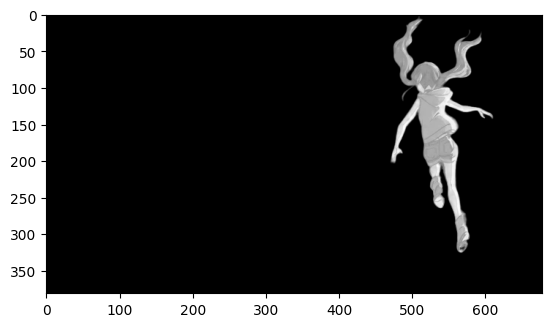

In [37]:
show_img(difference_single)

In [38]:
def compute_binary_mask(difference_single_channel):

    difference_binary = np.where(difference_single_channel >= 10, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)

    return difference_binary

binary_mask = compute_binary_mask(difference_single)
print(binary_mask.shape)

(381, 678, 3)


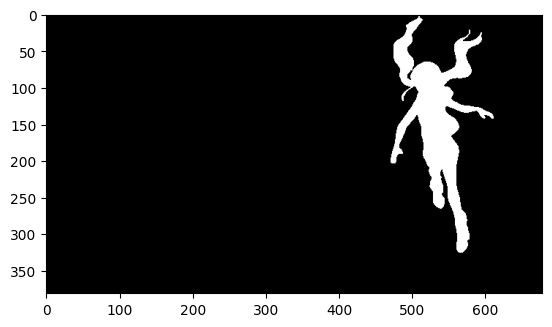

In [39]:
show_img(binary_mask)

In [40]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)

    binary_mask = compute_binary_mask(difference_single_channel)
    print(binary_mask.shape)
    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

output = replace_background(original_img, target_bg_img, object_img)

(381, 678, 3)


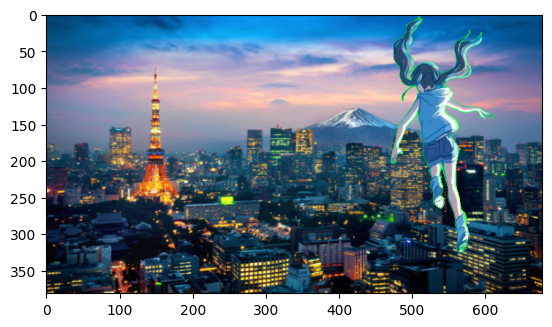

In [41]:
show_img(output)

## Others

In [24]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1],[2, 2, 2], [3, 3, 3]])
result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [25]:
m1 = np.eye(2)
m1 = np.reshape(m1,(-1,4))[0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


In [26]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1,(-1,4), "F")[0]
m2 = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[29 29 29 29]
